In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Iris.csv")

# Show the first few rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Drop the 'Id' column (not useful for prediction)
df.drop('Id', axis=1, inplace=True)

# Check class distribution
print("Class distribution in 'Species':")
print(df['Species'].value_counts())

# Check data info
df.info()


Class distribution in 'Species':
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Species' column to numbers
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Check the result
print("Encoded target values:", df['Species'].unique())


Encoded target values: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


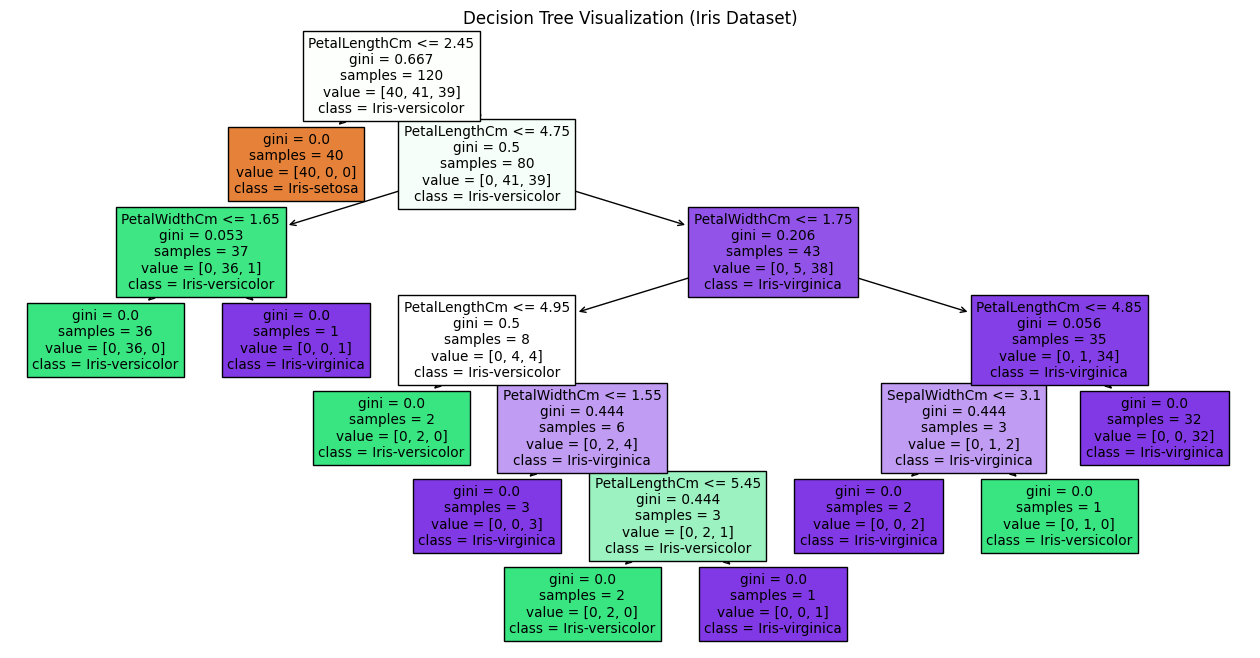

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 8))

# Plot the decision tree
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


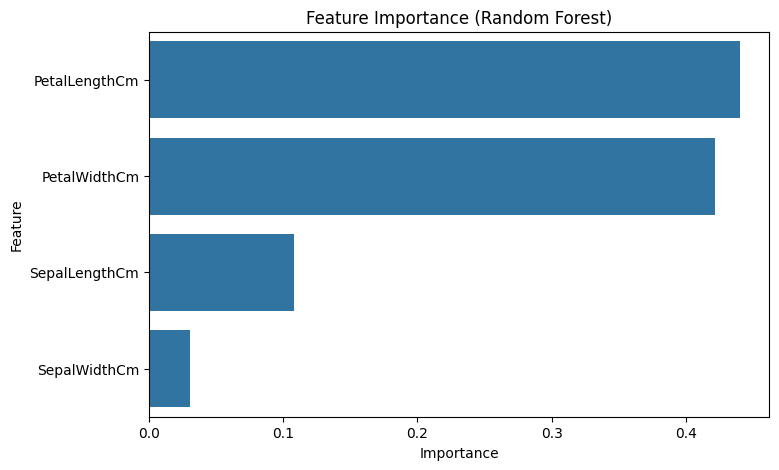

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation on Decision Tree
cv_dt = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree CV Scores:", cv_dt)
print("Decision Tree Mean Accuracy:", np.mean(cv_dt))

# Cross-validation on Random Forest
cv_rf = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest CV Scores:", cv_rf)
print("Random Forest Mean Accuracy:", np.mean(cv_rf))


Decision Tree CV Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Decision Tree Mean Accuracy: 0.9533333333333334

Random Forest CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest Mean Accuracy: 0.9666666666666668
